In [6]:
import os
import json
import matplotlib.pyplot as plt
import re
import matplotlib as mpl

In [7]:
def plot_metrics(parent_folder, metrics, title="", b=4, tstep=20):
    """
    This function finds the two subfolders in the parent folder, reads all JSON files in each,
    and plots the specified metrics over time steps.

    :param parent_folder: Path to the parent folder
    :param metrics: List of metrics to be plotted
    """
    # mpl.style.use("seaborn-v0_8")
    mpl.rcParams["figure.dpi"] = 300

    # Find subfolders in the parent folder
    subfolders = [f.path for f in os.scandir(parent_folder) if f.is_dir()]

    # Regular expression to extract the numeric part from filenames
    step_pattern = re.compile(r"step_(\d+)\.json")
    plt.rcParams["figure.figsize"] = (8,3)

    # Iterate over each subfolder
    for i, subfolder in enumerate(subfolders):
        mapping = {}
        time_steps = []
        data = {metric: [] for metric in metrics}

        # Find and sort the JSON files by the numeric step
        files = [
            f
            for f in os.listdir(subfolder)
            if f.endswith(".json") and step_pattern.match(f)
        ]
        files.sort(key=lambda f: int(step_pattern.match(f).group(1)))

        # Read each sorted JSON file
        for file_name in files:
            file_path = os.path.join(subfolder, file_name)
            with open(file_path, "r") as file:
                json_data = json.load(file)
                # Extract the step number from the file name
                step = int(step_pattern.match(file_name).group(1))
                pct = ((step * b) / (5200 + (step * b))) * 100
                samples = step*b
                time_steps.append(samples)
                mapping[samples] = pct
                # Collect the metrics values
                for metric in metrics:
                    value = json_data.get(metric, None)
                    if isinstance(value, list) and len(value) > 1:
                        # Take the second element if the value is a list and has at least 2 elements
                        data[metric].append(value[1])
                    else:
                        data[metric].append(value)

        # Plot the metrics for the subfolder
        colors = ["#7F4FB3", "#E67E00", "#32a852", "orange"]
        line_style = ['-', '--']
        alpha = [1, .4] 
        for j, metric in enumerate(metrics):
            if j > 0:
                j= 1
            plt.plot(
                time_steps,
                data[metric],
                label=f"{' '.join(os.path.basename(subfolder).replace('_', '  ').split()[:-1])} - {metric}".replace(
                    "llama", "Llama-70B"
                )
                .replace("non reddit", "non-Reddit")
                .replace("wiki csai", "Wiki CS/AI")
                .replace("reddit", "Reddit")
                .replace("medicine", "Medicine")
                .replace("test", "")
                .replace("f1", "F1")
                .replace("roc_auc", "AUC"),
                color=colors[i],
                linestyle=line_style[j],
                alpha=alpha[j],
            )

    plt.xlabel("Percentage of total trainings data and number of samples used for fine-tuning", fontsize=10)
    plt.ylabel("Metric value", fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.title(title, fontsize=12)
    plt.legend()

    plt.grid(True)
    plt.ylim(0, 1.1)

    
    ticks = [0+i*tstep for i in range(9) if 0+i*tstep in mapping]
    print(ticks)
    labels = [f"{mapping[i]:.2f}%\n(N={i})" for i in ticks]
    plt.xticks(ticks, labels)

    plt.show()

[0, 20, 40, 60, 80, 100, 120, 140, 160]


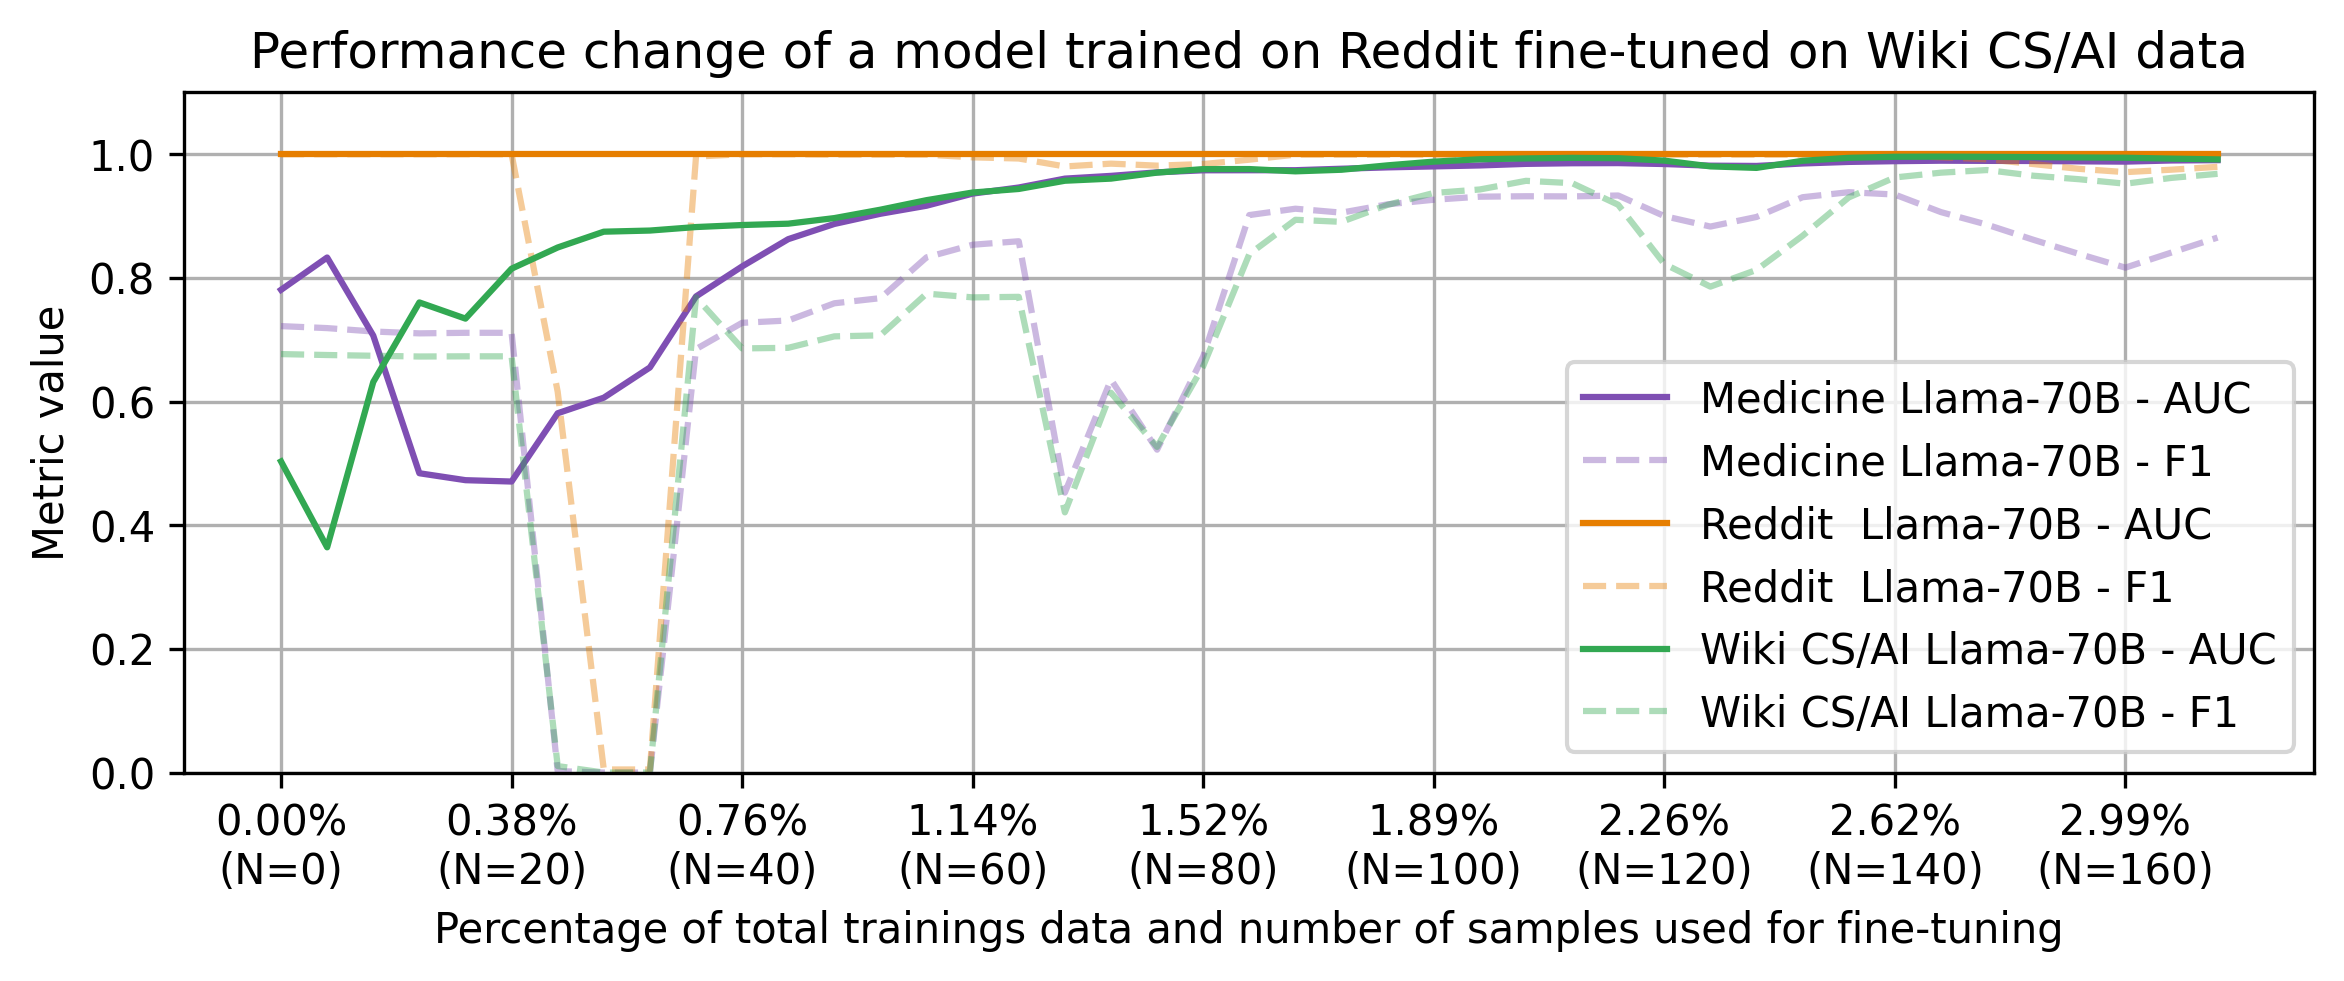

In [8]:
EVAL_FOLDER = "models/train_conf_wiki_csai_llama_back/eval"
metrics_to_plot = [
    "roc_auc",
    "f1",
    # "precision",
]  # Replace with the list of metrics you want to plot
title="Performance change of a model trained on Reddit fine-tuned on Wiki CS/AI data"
plot_metrics(EVAL_FOLDER, metrics_to_plot, title,b=4)

[0, 200, 400, 600, 800, 1000, 1200]


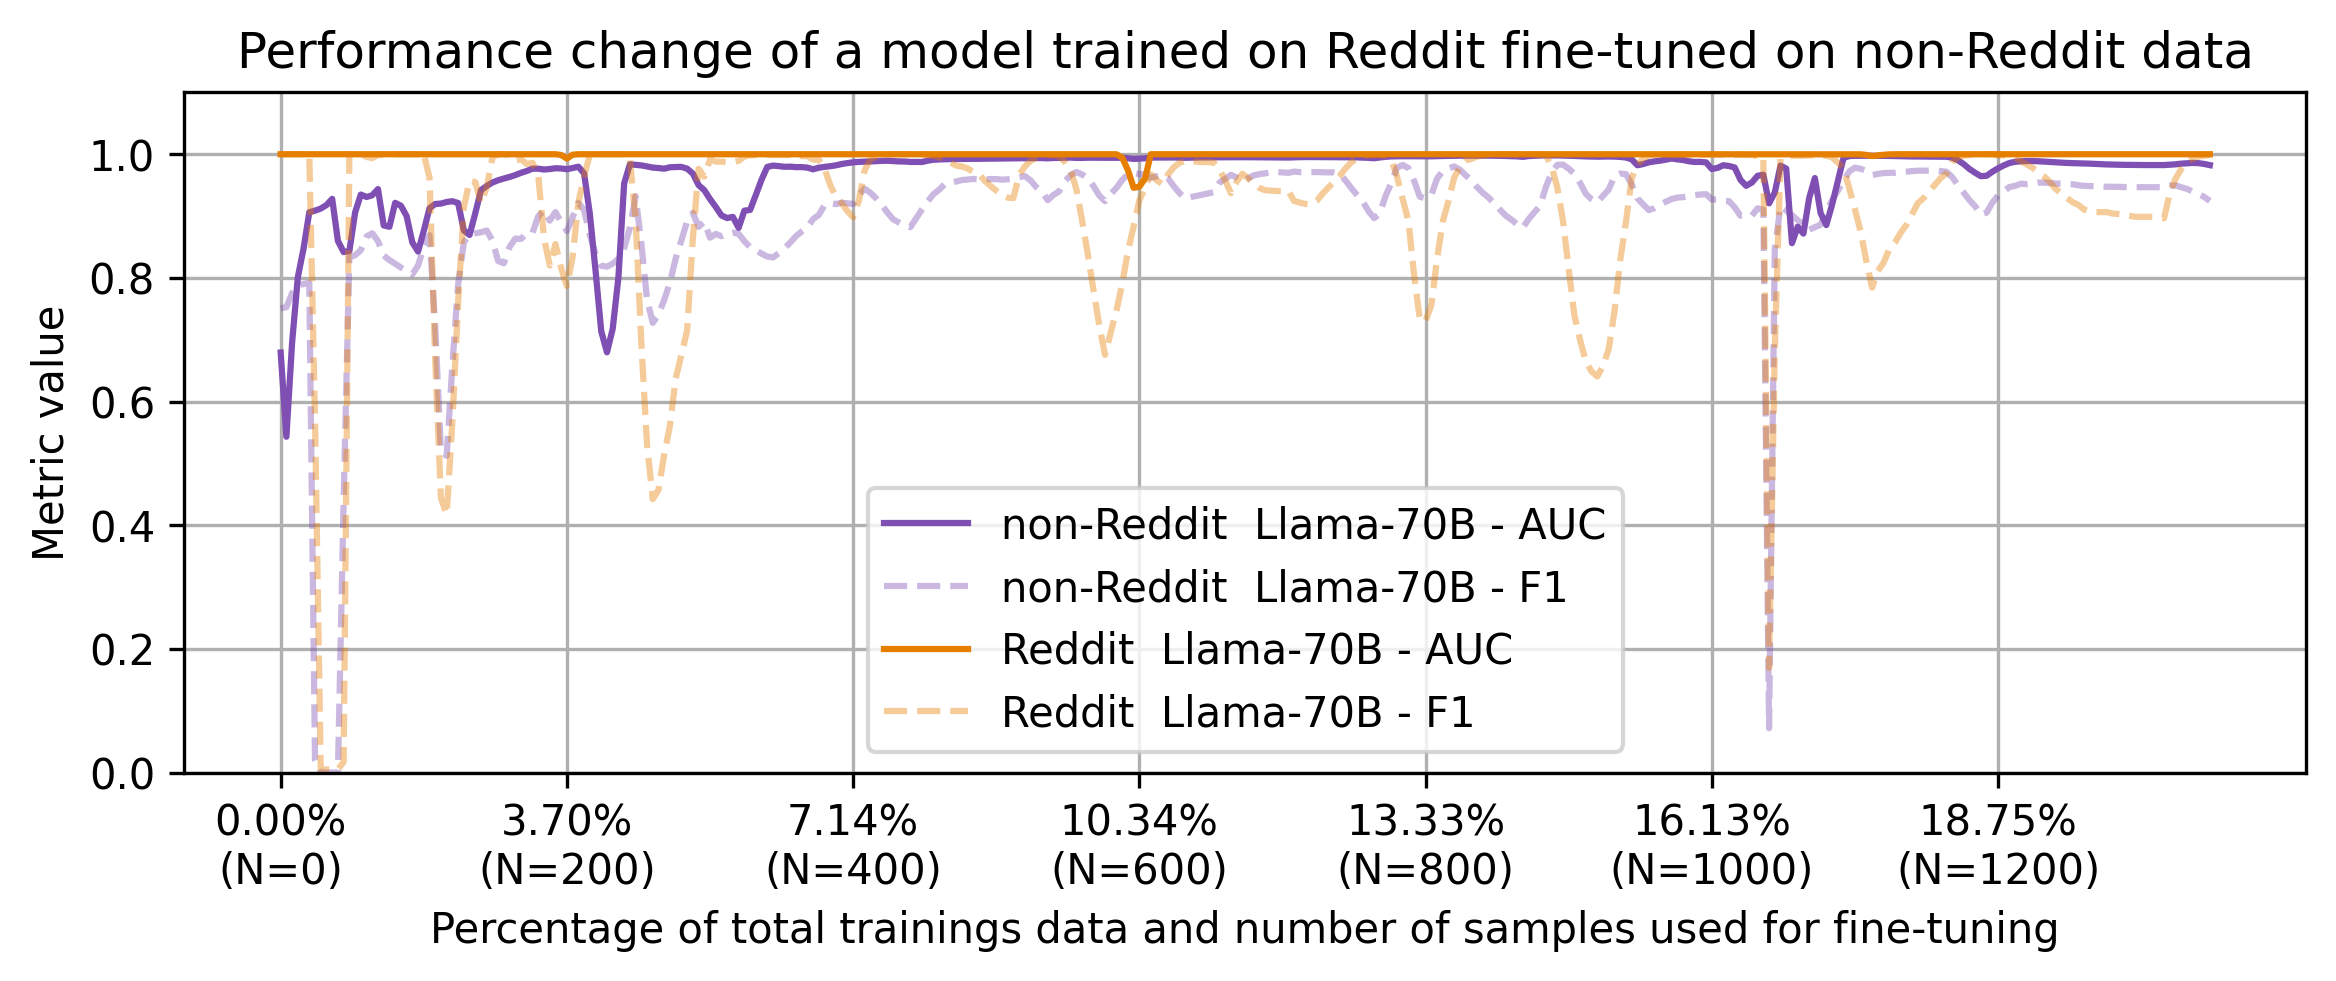

In [9]:
EVAL_FOLDER = "models/train_conf_non_reddit_test_llama/eval"
metrics_to_plot = [
    "roc_auc",
    "f1",
    # "precision",
]  # Replace with the list of metrics you want to plot
title="Performance change of a model trained on Reddit fine-tuned on non-Reddit data"
plot_metrics(EVAL_FOLDER, metrics_to_plot, title,b=4, tstep=200)